In [30]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw = pd.read_csv(os.path.join('.','conversion_data.csv'))
print(raw.shape)
raw.head()

(316200, 6)


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
raw.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [3]:
raw.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### 2. Fix the age outlier

In [9]:
raw[raw.age>=100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [13]:
raw.loc[raw.age==123,'age'] = raw[raw.country=='Germany'].age.mode()[0]
raw.loc[raw.age==111,'age'] = raw[raw.country=='UK'].age.mode()[0]

In [14]:
raw.age.max()

79

## 2. Bivariant Analysis - Country

### 2.1 Examine Country & New Users

In [6]:
raw.country.value_counts(normalize=True)

US         0.563226
China      0.242258
UK         0.153226
Germany    0.041290
Name: country, dtype: float64

In [7]:
raw.groupby('country')['new_user'].value_counts(normalize=True)

country  new_user
China    1           0.698520
         0           0.301480
Germany  1           0.677237
         0           0.322763
UK       1           0.679835
         0           0.320165
US       1           0.681985
         0           0.318015
Name: new_user, dtype: float64

In [8]:
raw.groupby('new_user')['country'].value_counts(normalize=True)

new_user  country
0         US         0.569458
          China      0.232203
          UK         0.155968
          Germany    0.042370
1         US         0.560366
          China      0.246872
          UK         0.151967
          Germany    0.040795
Name: country, dtype: float64

### 2.2. Examine Country & Age

In [22]:
raw.groupby('country').age.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,76602.0,30.672972,8.283862,17.0,24.0,30.0,36.0,69.0
Germany,13056.0,30.442479,8.249484,17.0,24.0,30.0,36.0,64.0
UK,48450.0,30.449804,8.236880,17.0,24.0,30.0,36.0,70.0
US,178092.0,30.566482,8.272128,17.0,24.0,30.0,36.0,79.0


In [24]:
raw.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### 2.3. Examine Country and PageView

In [26]:
raw.groupby('country')['total_pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,76602.0,4.553523,2.804987,1.0,2.0,4.0,6.0,26.0
Germany,13056.0,5.190717,3.762899,1.0,2.0,4.0,7.0,27.0
UK,48450.0,5.082167,3.630763,1.0,2.0,4.0,7.0,27.0
US,178092.0,4.930160,3.427085,1.0,2.0,4.0,7.0,29.0


### 2.4 Examine Country and Source

In [29]:
raw.groupby('country')['source'].value_counts(normalize=True)*100

country  source
China    Seo       49.056160
         Ads       28.146785
         Direct    22.797055
Germany  Seo       49.264706
         Ads       28.799020
         Direct    21.936275
UK       Seo       49.124871
         Ads       27.900929
         Direct    22.974200
US       Seo       48.979741
         Ads       28.019788
         Direct    23.000472
Name: source, dtype: float64

### 2.5 Examine Country and Conversion

In [63]:
raw.groupby('country')['converted'].value_counts()

country  converted
China    0             76500
         1               102
Germany  0             12240
         1               816
UK       0             45900
         1              2550
US       0            171360
         1              6732
Name: converted, dtype: int64

In [64]:
df_country_conversion = raw.groupby('country')['converted'].value_counts(normalize=True).to_frame('conversion%').reset_index()
df_country_conversion

,country,converted,conversion%
0,China,0,0.998668
1,China,1,0.001332
2,Germany,0,0.937500
3,Germany,1,0.062500
4,UK,0,0.947368
5,UK,1,0.052632
6,US,0,0.962199
7,US,1,0.037801


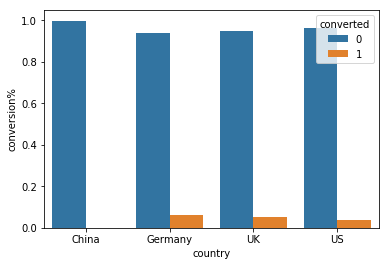

In [65]:
sns.barplot(x = df_country_conversion.country,
            y = df_country_conversion['conversion%'], 
            hue = df_country_conversion.converted)

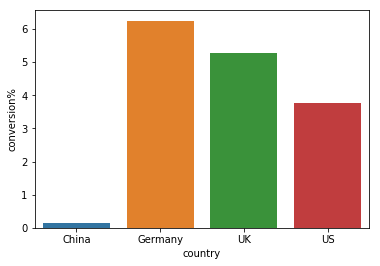

In [68]:
sns.barplot(x = df_country_conversion[df_country_conversion.converted==1].country,
            y = df_country_conversion[df_country_conversion.converted==1]['conversion%']*100)

## 3. Bivariant Analysis - Source

### 3.1 Examine Source and age

In [34]:
raw.groupby('source')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
Ads,88740.0,30.533795,8.235444,17.0,24.0,30.0,36.0,70.0
Direct,72420.0,30.567978,8.272502,17.0,24.0,30.0,36.0,79.0
Seo,155040.0,30.590203,8.286374,17.0,24.0,30.0,36.0,73.0


### 3.2 Examine Source and Page

In [36]:
raw.groupby('source')['total_pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
Ads,88740.0,4.899538,3.384374,1.0,2.0,4.0,7.0,29.0
Direct,72420.0,4.816901,3.282562,1.0,2.0,4.0,6.0,29.0
Seo,155040.0,4.883946,3.343005,1.0,2.0,4.0,7.0,27.0


### 3.3 Examine Source and NewUser

In [49]:
df_source_user = raw.groupby('source')['new_user'].value_counts().to_frame('counts').reset_index()
df_source_user

,source,new_user,counts
0,Ads,1,60849
1,Ads,0,27891
2,Direct,1,49742
3,Direct,0,22678
4,Seo,1,106153
5,Seo,0,48887


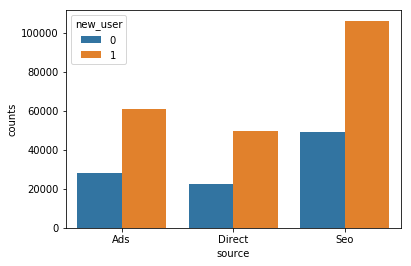

In [48]:
sns.barplot(x = df_source_user.source,
            y=df_source_user.counts, 
            hue=df_source_user.new_user)

In [56]:
raw.groupby('source')['converted'].value_counts().to_frame('counts').reset_index()

,source,converted,counts
0,Ads,0,85680
1,Ads,1,3060
2,Direct,0,70380
3,Direct,1,2040
4,Seo,0,149940
5,Seo,1,5100


In [58]:
df_source_convert = raw.groupby('source')['converted'].value_counts(normalize=True).to_frame('counts').reset_index()
df_source_convert

,source,converted,counts
0,Ads,0,0.965517
1,Ads,1,0.034483
2,Direct,0,0.971831
3,Direct,1,0.028169
4,Seo,0,0.967105
5,Seo,1,0.032895


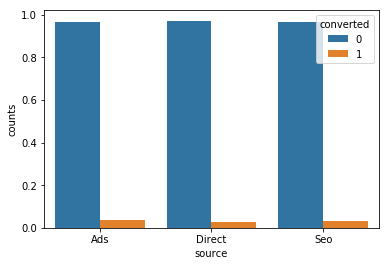

In [55]:
sns.barplot(x=df_source_convert.source,
            y=df_source_convert.counts,
            hue=df_source_convert.converted)

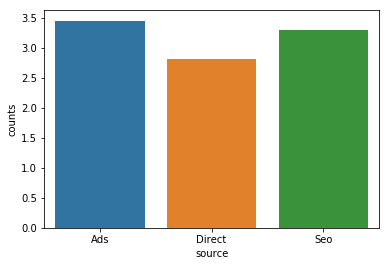

In [61]:
sns.barplot(x=df_source_convert[df_source_convert.converted==1].source,
            y=df_source_convert[df_source_convert.converted==1].counts*100)

In [35]:
raw.tail()

,country,age,new_user,source,total_pages_visited,converted
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0
316199,UK,24,0,Ads,4,0


In [69]:
raw.age.describe()

count    316200.000000
mean         30.569282
std           8.268940
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64